# Project: Investigate the Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I will be analyzing data from the 'TMDb Movie Data', provided by [KAGGLE](https://www.kaggle.com/tmdb/tmdb-movie-metadata).  Within this dataset, there are over 10,000 movies over the past 55 years to be viewed and anaylzed.  I have been a huge movie fan, but have always wondered how the length of the movie effects the overall movie.  By diving into this data, I hope to find my answer.

#### QUESTIONS TO BE ANALYZING:
* Top 5 Actors and Directors by Number of Movies
* Which Director made the most money?
* Average information from budget, runtime, profit, vote_score
* Which genre had the longest run time & most profit?
* Have the movies progressively got longer over the past years?
* Which directors made the longest, on average, movies?
* Which production company has made the longest, on average, movies?
* Did run time have an influence on how the movies was rated/voted?
* Does run time make more money or less?
    
The main questions that are being asked, does the length of the movie have an influence on how much the movie makes and if it does well overall & who would I work with, to make a movie, take make the most amount of profit?
   

<a id='intro'></a>
## Loading Modules & CSV File into Dataset

In [4]:
#Importing the modules for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Load the CSV file using Pandas
df = pd.read_csv('tmdb-movies.csv')
#Quick view of the information in the CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# View the data to understand what is needed in the analysis
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties
    - There are 10,866 row(movies) in the dataset
    - There are 21 columns in the dataset

In [8]:
df.shape

(10866, 21)

### Data Cleaning
**Steps that will be taken to clean data:**
    - Find duplicated rows and remove
    - Remove unnecessary columns that are not needed to perform the analysis needed
    - Remove columns with $0 for revenue and budget, since these numbers will skew the data
    - Change the 0 in run time to NaN, therefore, will not hinder the data
    - Add column for Profit
    - Add column that will group the run time into hours

In [9]:
# Remove Duplicates in the data, therefore, will not skew the data
df.drop_duplicates(inplace=True)
# Esnure duplicates are removed
print ('There are: {} duplicates.'.format(df.duplicated().sum()))

There are: 0 duplicates.


In [10]:
# Removing Columns that are not needed in this analysis to answer the questions posted at the beginning of the project
df.drop(['id', 'imdb_id', 'tagline', 'vote_count', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'popularity'], axis=1, inplace=True)
# Verify changes were made
df.head(1)


,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015


In [11]:
# Removing bugdet and revenue both == 0, replacing with NaN to help reduce skewing the data
zeroes = ['revenue', 'budget']
df[zeroes] = df[zeroes].replace(0, np.NaN)
df.dropna(subset = zeroes, inplace=True)

print('Now we have {} rows and columns.'.format(df.shape))

Now we have (3854, 11) rows and columns.


In [12]:
# Replacing 0 in 'runtime' with NaN to help not skew averages for run time
df['runtime'] = df['runtime'].replace(0, np.NaN)

In [13]:
# Adding a Profit Column to help determine the amount of money made or lost when the movie was produced
df.insert(2,'Profit', df['revenue']-df['budget'])

# Verify the column was added properly
df.head(1)

,budget,revenue,Profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015


In [14]:
# Creating column to combine runtimes for easier analyzation and grouping to help determine run times.
# Attempted defining function, could not get it to work properly
df.insert(7, 'com_runtime', np.where(df['runtime'] <= 90, "1.5 Hours or Less", np.where(df['runtime'] <= 120, "1.5 - 2 Hours", np.where(df['runtime'] <= 150, "2 - 2.5 Hours", np.where(df['runtime'] <= 180, "2.5 - 3 Hours",  "3 Hours or More")))))

# Verify the column was added properly
df.head(5)

,budget,revenue,Profit,original_title,cast,director,runtime,com_runtime,genres,production_companies,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2 - 2.5 Hours,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,1.5 - 2 Hours,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,1.5 - 2 Hours,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2 - 2.5 Hours,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2 - 2.5 Hours,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015


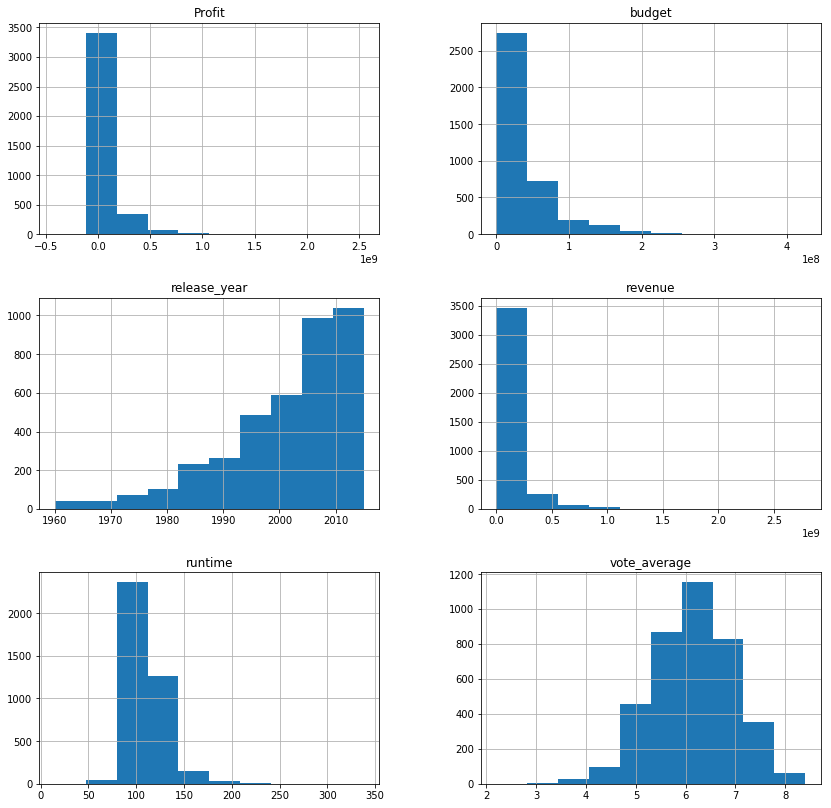

In [54]:
df.hist(figsize=(14, 14));

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Top 5 Directors, Production Companies & Actors by # of Movies

In [15]:
# Top 5 Directors who directed the most movies to begin the analysis and base of directors.
drct=df['director'].str.cat(sep='|').split('|')
drct=pd.Series(drct).value_counts(ascending=False)

drct.head(5)

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Robert Rodriguez    17
dtype: int64

In [16]:
# Top 5 Actors who where in movies, just to view the most amount of actors
actor=df['cast'].str.cat(sep='|').split('|')
actor=pd.Series(actor).value_counts(ascending=False)

actor.head(5)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

In [17]:
# Top 5 production companies that produced the most amount of movies, to help with base on production 
# companies to help with the analysis
prod=df['production_companies'].str.cat(sep='|').split('|')
prod=pd.Series(prod).value_counts(ascending=False)

prod.head(5)

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

### Question 2: Which Director Made the Most Profits?

In [18]:
# Finding any Null or Blank values
df['director'].isnull().sum()

1

In [19]:
# Drop the NaN value & Find top 5 Directors who made the most amount of money.
# This is to see who makes the most profit, to determine who to work for
df.dropna(subset=['director'], inplace=True)
drct_top = df.groupby('director')['Profit'].sum().reset_index()
drct_top.sort_values(by='Profit', ascending=False, inplace=True)

drct_top[:5]

,director,Profit
1548,Steven Spielberg,7.467064e+09
1242,Peter Jackson,5.197245e+09
643,James Cameron,5.081995e+09
1068,Michael Bay,3.557208e+09
381,David Yates,3.379296e+09


**After removing the blank data, the top 5 directors that have made the most profits are distinguished.**

### Question 3: Average Items for High Level View

In [20]:
# Getting averages of the below 4 to just get a baseline for the conclusions of the analysis
# Average Budget
budget_avg = df['budget'].mean()
print('The Average Budget of a Movie is: ${:,.2f}'.format(budget_avg))
# Average Revenue
revenue_avg = df['revenue'].mean()
print('The Average Revenue of a Movie is: ${:,.2f}'.format(revenue_avg))
# Average Profit
profit_avg = df['Profit'].mean()
print('The Average Profit of a Movie is: ${:,.2f}'.format(profit_avg))
# Average Runtime
runtime_avg = df['runtime'].mean()
print('The Average Run Time of a Movie is: {0:.2f} minutes'.format(runtime_avg))

The Average Budget of a Movie is: $37,212,267.86
The Average Revenue of a Movie is: $107,711,709.95
The Average Profit of a Movie is: $70,499,442.09
The Average Run Time of a Movie is: 109.21 minutes


### Question 4: Top 5 Genres w/ Longest Average Run Time & Profit

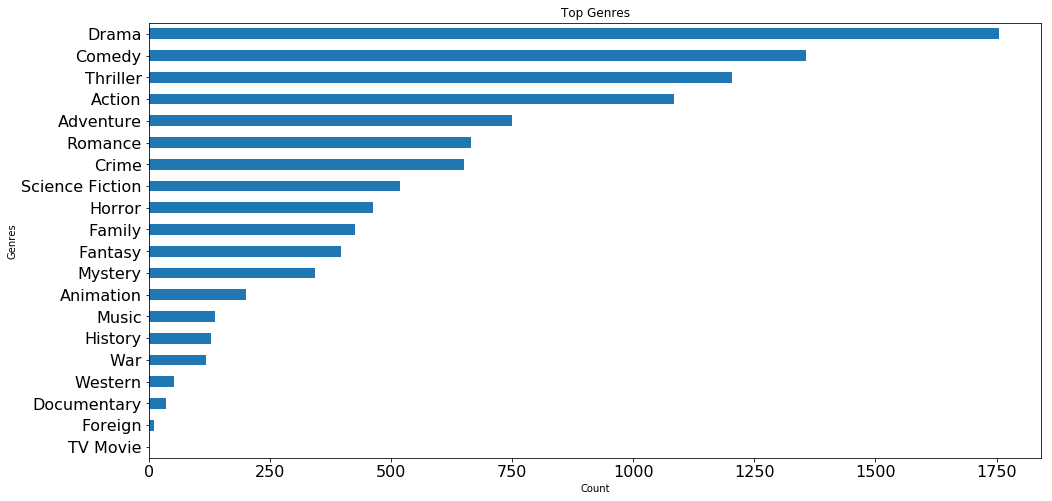

In [21]:
# Splitting Genres out and plotting on chart to find the highest amount
# Creating a baseline of genres to continue the analysis on genres in reflection to profit and run time
top_genre=df['genres'].str.cat(sep='|').split('|')
top_genre=pd.Series(top_genre).value_counts(ascending=True)

# Plotting on bar chart to make visually easier to read
fig = top_genre.plot.barh(x='Count',y='genres',title='Top Genres', figsize=(16, 8), fontsize=16)
fig.set_xlabel('Count')
fig.set_ylabel('Genres');

**With splitting all the genres, Drama is the most common within all the movies.**

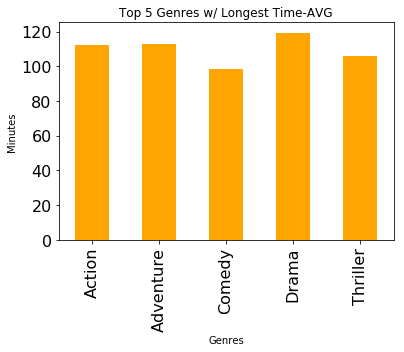

In [22]:
# Making Bar Chart with top 5, then looking at average runtime for those.
# This is to determine which movies are the shortest, to see which movie to make.
genre_list = ['Drama', 'Comedy', 'Thriller','Action', 'Adventure']
genre_time = df[df.genres.isin(genre_list)].groupby('genres').runtime.mean().plot.bar(x='genres',title='Top 5 Genres w/ Longest Time-AVG', fontsize=16, color='orange')
genre_time.set_xlabel('Genres')
genre_time.set_ylabel('Minutes');

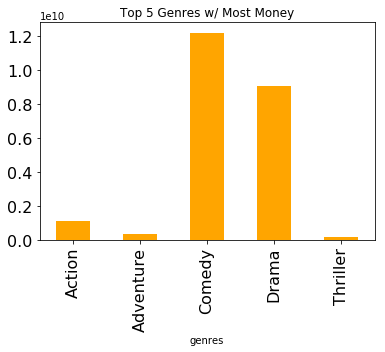

In [23]:
#Top 5 Genres that have made the most money
# Looking at the above chart, comedy is shortest on average movie, now making correlation to profit to see if it pays off
# to make shorter movies in regards to profit
genre_list = ['Drama', 'Comedy', 'Thriller','Action', 'Adventure']
genre_money = df[df.genres.isin(genre_list)].groupby('genres').Profit.sum().plot.bar(x='genres',title='Top 5 Genres w/ Most Money', fontsize=16, color='orange')
genre_time.set_xlabel('Genres')
genre_time.set_ylabel('Money');

**Comedy makes the most amount of money and also being the shortest, on average, runtime.**

### Question 5: Have Movies Progressively Gotten Longer Throughout the Year & Direction of Profits?

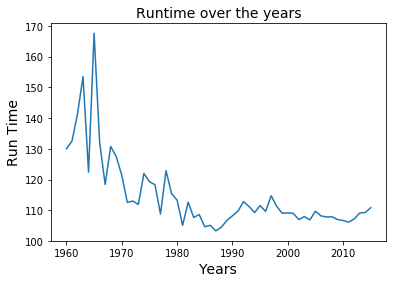

In [24]:
# View of each year, if movies run time has gotten longer.
# Continuing to get a base line on run time throughout the year, to see if making a movie shorter or longer makes more money
fig = df.groupby('release_year')['runtime'].mean()

plt.plot(fig)
plt.title('Runtime over the years', fontsize = 14,)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Run Time', fontsize = 14)
plt.show()

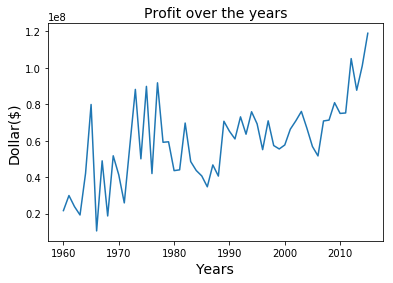

In [33]:
# View of each year, has profits increased
fig = df.groupby('release_year')['Profit'].mean()

plt.plot(fig)
plt.title('Profit over the years', fontsize = 14,)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Dollar($)', fontsize = 14)
plt.show()

**Looking at this data, here are some quick observations:**
* The average runtime of a movie has decreased
* Profits have increased over the years
* A summary statement can be assumed: over the years, the shorter the movie, the more money it will make.

### Question 6: Which Director, on Average, has Made the Longest Movies

In [25]:
# Quick view of top 5 directos, how long their movies are
# Running this is to see, on average, which director makes the longest movie.  From previous anaylsis, shorter movies
# make more profit. 
five_drct = ['Steven Spielberg','Peter Jackson','James Cameron','Michael Bay','David Yates']
runtime_dir = df[df.director.isin(five_drct)].groupby('director').runtime.mean().reset_index()
runtime_dir.sort_values(by='runtime', ascending=False, inplace=True)
runtime_dir.head()

,director,runtime
3,Peter Jackson,151.636364
2,Michael Bay,146.727273
0,David Yates,141.750000
1,James Cameron,138.750000
4,Steven Spielberg,135.444444


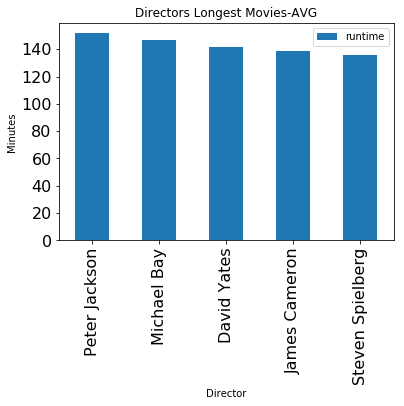

In [51]:
# Bar Chart of top 5 directos
# Making bar chart for more visually appealing.  In works to make a movie, who do you want to direct your movie.
fig = runtime_dir.plot.bar(x='director',title='Directors Longest Movies-AVG', fontsize=16)
fig.set_xlabel('Director')
fig.set_ylabel('Minutes');

**While looking at the directors that have directed the most films, Steven Spielberg has made the most movies, with the lowest, on average movie length & has made the most amount of profits.**

### Question 7: Which Production Company has Made the Longest, on Average, Movies?

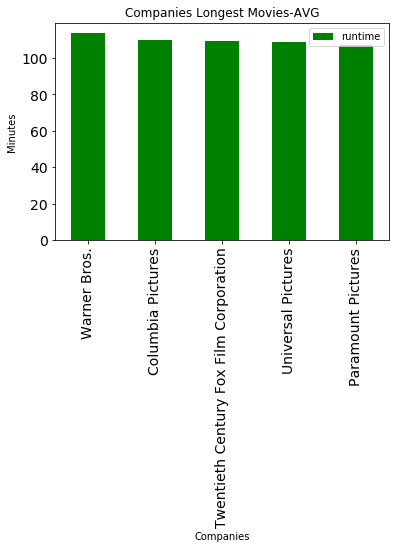

In [40]:
# Taking top 5 production companies, seeing on average, how long their movies are
# Reason for running this data is seeing which company makes the longest movies, since we determined that shorter movies
# make the most profit and which company to work with.
five_prod = ['Universal Pictures','Warner Bros.','Paramount Pictures','Twentieth Century Fox Film Corporation','Columbia Pictures']
prod_length = df[df.production_companies.isin(five_prod)].groupby('production_companies').runtime.mean().reset_index()
prod_length.sort_values(by='runtime', ascending=False, inplace=True)

fig = prod_length.plot.bar(x='production_companies',title='Companies Longest Movies-AVG', fontsize=14, color='green')
fig.set_xlabel('Companies')
fig.set_ylabel('Minutes');

In [28]:
# Taking top 5 production companies, seeing on average, how much profit the companies make
# This is another determining factor when chosing a company to work with, if you wanted to make the largest profit on a movie
five_prod = ['Universal Pictures','Warner Bros.','Paramount Pictures','Twentieth Century Fox Film Corporation','Columbia Pictures']
prod_money = df[df.production_companies.isin(five_prod)].groupby('production_companies').Profit.sum().reset_index()
prod_money.sort_values(by='Profit', ascending=False, inplace=True)
prod_money.head()


,production_companies,Profit
1,Paramount Pictures,5.126633e+09
0,Columbia Pictures,3.232620e+09
3,Universal Pictures,2.018862e+09
2,Twentieth Century Fox Film Corporation,1.628601e+09
4,Warner Bros.,1.303533e+09


**Warner Bros. production company makes the longest movies and also makes the least amount of profit compared to the other top 5 production companies.  If you are to pick which production company to work with, it would be Paramount Pictures.**

### Question 8: Did Run Time have an Influence on how the Movies was Rated/Voted?

,com_runtime,budget,revenue,Profit,runtime,vote_average,release_year
0,1.5 - 2 Hours,3.284547e+07,8.666739e+07,5.382192e+07,104.110477,6.079291,2001.821443
1,1.5 Hours or Less,2.457904e+07,6.919297e+07,4.461393e+07,85.513566,5.825775,2001.600775
2,2 - 2.5 Hours,5.449702e+07,1.755466e+08,1.210496e+08,130.978523,6.554497,2000.448322
3,2.5 - 3 Hours,7.662450e+07,2.816402e+08,2.050157e+08,161.415094,6.936792,1996.811321
4,3 Hours or More,4.253548e+07,1.841950e+08,1.416595e+08,199.545455,6.948485,1986.727273


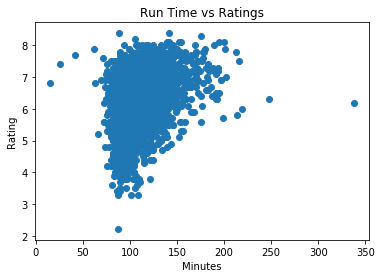

In [55]:
# Scatterplot of runtime and the voters average 
# Reason for running this analysis to see how the run time is rated/voted and if that makes a difference in the analysis.
plt.scatter(df['runtime'], df['vote_average'])
plt.title('Run Time vs Ratings')
plt.xlabel('Minutes')
plt.ylabel('Rating')

rated_time = df.groupby(['com_runtime'],as_index=False).mean()
rated_time.head()

**Movies that are within 1.5 and 2 hours has the higher amount ratings.**

### Question 9: Does Run Time Make More Money or Less?

In [30]:
# Looking at the runtime, seeing how much money these movies make, within the time frames
# This is to determine in making a movie, how long to make a movie so I can utilize the most profit
runtime_money = df.groupby('com_runtime')['Profit'].sum().reset_index()
runtime_money.sort_values(by='Profit', ascending=False, inplace=True)

runtime_money[:5]

,com_runtime,Profit
0,1.5 - 2 Hours,1.320252e+11
2,2 - 2.5 Hours,9.018197e+10
1,1.5 Hours or Less,2.302079e+10
3,2.5 - 3 Hours,2.173166e+10
4,3 Hours or More,4.674765e+09


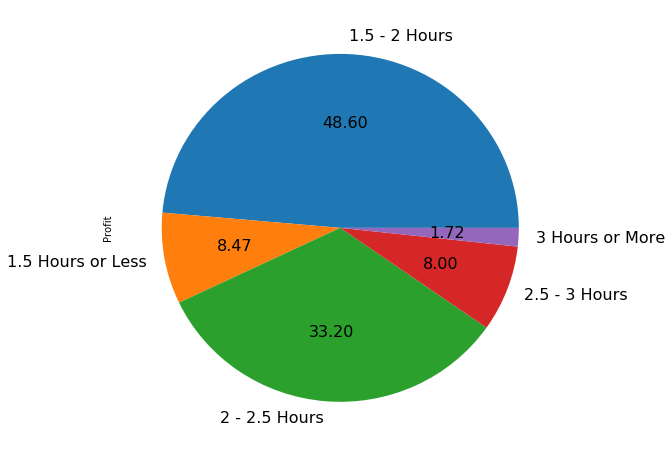

In [31]:
# Making pie charte for a more visually appealing to better tell the analysis
df.groupby('com_runtime')['Profit'].sum().plot.pie(autopct='%.2f', fontsize=16, figsize=(8, 8));

**Movies that are made withing 1.5 to 2 hours make the most amount of money and account for nearly 50% of overall profit.**

<a id='conclusions'></a>
## Conclusions
* Movies that are within 1.5 to 2 hours, make the most amount of money
* Voter average for 1.5 to 2 hours, 6.08, is over the median of 5.97
* Steven Spielbergs films make the most amount of profit & out of the top 5 directors, on average, he makes the shortest films
* Over the past 55 years, movies have stayed constant for run time
* Comedies have made the most amount of money, but drama movies have been made the most
* Comedies are the shorter movies out of the top 5
* Warner Bros company, on average, makes the longest movies

If I was going to be making a movie, I would be producing a comedic movie that is within 1.5 to 2 hours.  I would work with Paramount Pictues, due to the amount of profit, overall, that the company has made from their movies.  

The intial question of: Does the length of the movie have an influence on how much the movie makes and if it does well overall, has been answered.  With the analysis, movies that are made within 1.5 and 2 hours, they account for nearly 50% of the total profit of movies produced.  Movies that are made within that time frame, is about the median average of the voter average.
>##### Limitations
* This data set is only 55 years of data and there are missing portions within the data itself.
* Due to the dataset, might not be represent each movie accurately.(i.e. runtime 2,3 or 900 minutes???, \$2,\$3 revunue???, titles with different wildcards and symbols)
* Few columns that are completely unnecessary.
* Dataset might not update frequently.
* Just has overall revenue and budget, if the analysis would like to see "how" exactly to make money, need to be more specific on where the money is being spent.
* How much was money was spent on actors and directors.

Regardless of the limitations of this dataset, you can still analyze this data and get a close to rough estimate on data and information that is needed to answer specific questions, in regards to movies.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0